In [1]:
# 导入库
import numpy as np  # numpy库
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.svm import LinearSVR  # SVM中的回归算法
#from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库
import xlwt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#读取表头
workbook = xlwt.Workbook(encoding='utf-8')
#创建表
worksheet = workbook.add_sheet('sheet1')
#往单元格内写入内容:写入表头
worksheet.write(0, 0, label="真实值")
worksheet.write(0, 1, label="贝叶斯")
worksheet.write(0, 2, label="线性回归")
worksheet.write(0, 3, label="弹性网络回归")
worksheet.write(0, 4, label="支持向量")

In [3]:
#Train
raw_data = pd.read_csv(open(r'\单台震中距预测\时间窗\1s\SVR\10个训练特征.csv',encoding='UTF-8'))
X_train = raw_data.iloc[:, 0:10].values
y_train = raw_data.iloc[:, 10].values    #导入数据  iloc通过行号获取行数据
#print("X",X)
#print("y",y)
#print("X",len(X))  

#Test
raw_data1 = pd.read_csv(open(r'\单台震中距预测\时间窗\1s\SVR\10个测试特征.csv',encoding='UTF-8'))
X_test = raw_data1.iloc[:, 0:10].values
y_test = raw_data1.iloc[:, 10].values    #导入数据  iloc通过行号获取行数据


In [5]:
#网格搜索最佳参数
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), param_grid={"C":[0.01,0.1, 1, 10,100], "gamma": [0.001, 0.01, 0.1, 1, 10,100, 1000],'epsilon':[0.01,0.1, 1, 10,100]})
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f"
     % (grid.best_params_, grid.best_score_))


#from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(SVC(), param_grid={"C":[0.001,0.01,1,10,100], "gamma": [0.001,0.01,1,10,100]})
#grid.fit(arr, train_y.ravel())
#print("The best parameters are %s with a score of %0.2f"
#      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 100, 'epsilon': 10, 'gamma': 0.1} with a score of 0.64


In [4]:

# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
#model_svr = SVR(kernel='rbf',C=grid.best_params_['C'],epsilon=grid.best_params_['epsilon'],gamma=grid.best_params_['gamma'])  # 建立支持向量机回归模型对象 ,C= 0.01,epsilon= 0.016756819922500475
model_svr = SVR(kernel='rbf',C=100,epsilon=10,gamma=0.1)  # 建立支持向量机回归模型对象 ,C= 0.01,epsilon= 0.016756819922500475


model_names = ['SVR']  # 不同模型的名称列表

scores = cross_val_score(model_svr, X_train, y_train, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
cv_score_list = []  # 交叉检验结果列表
cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
model_svr.fit(X_train, y_train)
train_prediction=model_svr.predict(X_train)
    

print(model_svr)


# 模型效果指标评估
n_samples, n_features = X_train.shape  # 总样本量506,总特征数13
#print(n_samples, n_features)
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(1):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y_train, train_prediction)  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ev \t explained_variance')
print ('mae \t mean_absolute_error')
print ('mse \t mean_squared_error')
print ('r2 \t r2')
print (70 * '-')  # 打印分隔线


  
print("训练标准差=",np.std(y_train-train_prediction))
print("训练误差均值=",np.mean(y_train-train_prediction))
print("训练平均绝对误差=",np.mean(abs(y_train-train_prediction)))

#测试
test_prediction=model_svr.predict(X_test)

from sklearn import metrics
from sklearn.metrics import r2_score
print(len(y_test-test_prediction))
print("测试标准差=",np.std(y_test-test_prediction))
print("测试误差均值=",np.mean(y_test-test_prediction))
print("测试平均绝对误差=",np.mean(abs(y_test-test_prediction)))

print("测试平均绝对误差MAE=",metrics.mean_absolute_error(test_prediction, y_test))
print("测试RMSE=",metrics.mean_squared_error(test_prediction, y_test)**0.5)
print("测试r2 score:", r2_score(y_test, test_prediction))



SVR(C=100, epsilon=10, gamma=0.1)
samples: 13353 	 features: 10
----------------------------------------------------------------------
cross validation result:
            0         1         2         3        4         5
SVR  0.657379  0.560491  0.634882  0.324082  0.47215  0.663728
----------------------------------------------------------------------
regression metrics:
           ev        mae         mse       r2
SVR  0.643663  11.793576  238.682739  0.64352
----------------------------------------------------------------------
short name 	 full name
ev 	 explained_variance
mae 	 mean_absolute_error
mse 	 mean_squared_error
r2 	 r2
----------------------------------------------------------------------
训练标准差= 15.446271394392365
训练误差均值= 0.3089317596911877
训练平均绝对误差= 11.793576306284997
3637
测试标准差= 15.594555743812492
测试误差均值= 1.0270157585149244
测试平均绝对误差= 11.652405057198852
测试平均绝对误差MAE= 11.652405057198852
测试RMSE= 15.62833741045775
测试r2 score: 0.6354743953910202


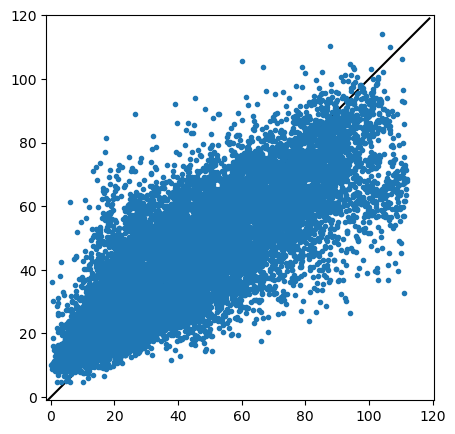

In [5]:
#训练结果
plt.figure(figsize=(5, 5))
plt.axis('equal')
#y_train-pre_y_list[3]
x3 = np.arange(-1, 120, 1)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_train,train_prediction,'.')
plt.xlim(-1, 120)
plt.ylim(-1, 120)
plt.show()

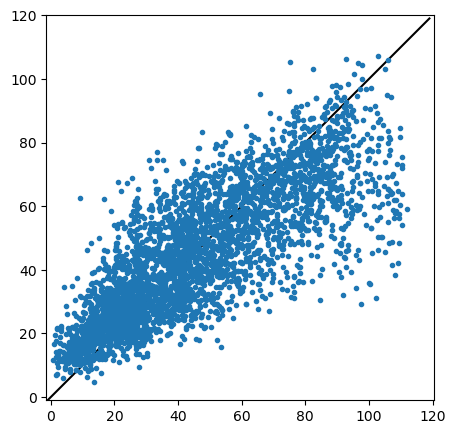

测试r2 score: 0.6354743953910202
测试平均绝对误差= 11.652405057198852


In [7]:
#测试结果
plt.figure(figsize=(5, 5))
plt.axis('equal')
#y_test-data
x3 = np.arange(-1, 120, 1)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_test,test_prediction,'.')
plt.xlim(-1, 120)
plt.ylim(-1, 120)
plt.show()

from sklearn.metrics import r2_score
print("测试r2 score:", r2_score(y_test, test_prediction))  #16.38  0.58
print("测试平均绝对误差=",np.mean(abs(y_test-test_prediction)))